In [75]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from ast import literal_eval

## 1. The Data

Let's first import the movies dataset and take a quick look at the data:

In [76]:
df_movie = pd.read_csv("data/movies_metadata.csv")
df_movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [77]:
df_movie.shape

(45466, 24)

In [78]:
df_movie.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [79]:
df_movie.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


## 2. Data Preprocessing

### 2.1 Missing Values

In [80]:
df_movie.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [81]:
# Drop columns that contain many missing values and are not crucial for our project goals
df_movie = df_movie.drop(["belongs_to_collection",
                          "homepage",
                          "tagline",
                          "overview",
                          "poster_path",
                          "imdb_id"], axis=1)

df_movie.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0


In [82]:
df_movie.isna().sum()

adult                     0
budget                    0
genres                    0
id                        0
original_language        11
original_title            0
popularity                5
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
spoken_languages          6
status                   87
title                     6
video                     6
vote_average              6
vote_count                6
dtype: int64

As we can see, there are still some missing values. Let's first take a look at the `revenue` and `budget` columns as they may include missing values that are represented by both `NaN` and `0`.

### `revenue`

In [83]:
df_movie["revenue"]

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45461            0.0
45462            0.0
45463            0.0
45464            0.0
45465            0.0
Name: revenue, Length: 45466, dtype: float64

At first glance, there seems to be quite a lot of zeros in the `revenue` column. Based on the documentation, 0 means that the value is missing. Let's take a closer look at the number of 0s in the column:

In [84]:
print((df_movie["revenue"] == 0).sum())
print((sum(df_movie["revenue"] == 0) / df_movie.shape[0]) * 100, "%")

38052
83.69330928605991 %


We will select the subset of data where revenue data are available:

In [85]:
df_movie_revenue = df_movie
df_movie_revenue["revenue"] = df_movie_revenue["revenue"].replace(0, pd.np.nan)
df_movie_revenue = df_movie_revenue[df_movie_revenue['revenue'].notna()].reset_index(drop=True)
df_movie_revenue["revenue"].isnull().sum()

0

In [86]:
df_movie_revenue.shape

(7408, 18)

In [87]:
df_movie_revenue["revenue"].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

### `budget`

In [88]:
df_movie_revenue["budget"]

0       30000000
1       65000000
2       16000000
3              0
4       60000000
          ...   
7403      750000
7404           0
7405      800000
7406     2000000
7407     5000000
Name: budget, Length: 7408, dtype: object

In [89]:
df_movie_revenue["budget"].dtype

dtype('O')

In [90]:
df_movie_revenue["budget"] = df_movie_revenue["budget"].astype(int)

In [91]:
print(sum(df_movie_revenue["budget"] == 0))
print((sum(df_movie_revenue["budget"] == 0) / df_movie_revenue.shape[0]) * 100, "%")

2027
27.36231101511879 %


Again, we select the subset of data where budget data are available:

In [92]:
df_movie_revenue_budget = df_movie_revenue
df_movie_revenue_budget["budget"] = df_movie_revenue_budget["budget"].replace(0, pd.np.nan)
df_movie_revenue_budget = df_movie_revenue_budget[df_movie_revenue_budget['budget'].notna()].reset_index(drop=True)
df_movie_revenue_budget["budget"].isnull().sum()

0

In [93]:
df_movie_revenue_budget.shape

(5381, 18)

In [94]:
df_movie_revenue_budget["budget"].describe()

count    5.381000e+03
mean     3.109480e+07
std      4.016263e+07
min      1.000000e+00
25%      5.037000e+06
50%      1.700000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

-----

Now that we've taken care of missing values for revenue and budget, in our new `df_movie_revenue_budget` dataset, there remains one column (`runtime`) with one missing value. We will deal with it now:

In [95]:
df_movie_revenue_budget.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 1
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [96]:
df_movie_revenue_budget["runtime"]

0        81.0
1       104.0
2       127.0
3       170.0
4       106.0
        ...  
5376    185.0
5377      0.0
5378    100.0
5379    107.0
5380     91.0
Name: runtime, Length: 5381, dtype: float64

In [97]:
df_movie_revenue_budget["runtime"].fillna(df_movie_revenue_budget["runtime"].median(), inplace=True)
df_movie_revenue_budget["runtime"].isnull().sum()

0

------

As we can see, now our dataset contains no missing values:

In [98]:
df_movie_revenue_budget.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [99]:
df_movie_revenue_budget.shape

(5381, 18)

-----

### 2.2 Transforming Columns

We can see that some columns contain JSON formatted strings: `genres`, `production_companies`, `production_countries`, and `spoken_languages`. We will deal with them now.

In [100]:
df_movie_revenue_budget.dtypes

adult                    object
budget                  float64
genres                   object
id                       object
original_language        object
original_title           object
popularity               object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
title                    object
video                    object
vote_average            float64
vote_count              float64
dtype: object

In [101]:
df_movie_revenue_budget.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
3,False,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,Heat,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,False,7.7,1886.0
4,False,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,Sudden Death,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,False,5.5,174.0


### Genres

We will create a column for each genre:

In [102]:
df_movie_revenue_budget["genres"]

0       [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
5376    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
5377    [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...
5378    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
5379    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
5380    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
Name: genres, Length: 5381, dtype: object

In [103]:
df_movie_revenue_budget["genres"].dtype

dtype('O')

In [104]:
uniqueGenres = set([])
for i in df_movie_revenue_budget.genres.values:
    genList = literal_eval(i) # convert from string to list of dict
    for j in genList: # loop through the list of dict
        uniqueGenres.add(j["name"]) # add the name of the genre to my uniqueGenres variabe

print(len(uniqueGenres))
uniqueGenres

20


{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [105]:
rows = [] # for all the movies
genres = list(uniqueGenres) # all unique Genres

for i in df_movie_revenue_budget.genres:
    genList = literal_eval(i) # convert from string to list of dict for a particular movie
    movieGenres = [x['name'] for x in genList] # list of all the genres of the movie
    row = [] # store a list of 1s and 0s for one movie
    
    for j in genres:
        # check if the genre is present in that movie - if the genre is present 1 else 0
        row.append(int(j in movieGenres))
    
    rows.append(row)

genre = pd.DataFrame(rows, columns=genres)
genre

,Comedy,Foreign,Drama,Crime,Action,Western,War,Science Fiction,Romance,Horror,Mystery,Thriller,Fantasy,Adventure,Family,Music,TV Movie,Documentary,History,Animation
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5377,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5378,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5379,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [106]:
genre.shape

(5381, 20)

In [107]:
df_movie_revenue_budget.shape

(5381, 18)

In [108]:
# Join the genres df with our main df and drop the original genre column
df_movie_revenue_budget = pd.concat([df_movie_revenue_budget, genre], axis=1)
df_movie_revenue_budget.drop(["genres"], axis=1, inplace=True)
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,...,Mystery,Thriller,Fantasy,Adventure,Family,Music,TV Movie,Documentary,History,Animation
0,False,30000000.0,862,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,1,0,0,0,0,1
1,False,65000000.0,8844,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,1,1,1,0,0,0,0,0
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,0,0,0,0,0
3,False,60000000.0,949,en,Heat,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,...,0,1,0,0,0,0,0,0,0,0
4,False,35000000.0,9091,en,Sudden Death,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,...,0,1,0,1,0,0,0,0,0,0


### Production Companies

We will extract the main producers and the counts and create new columns: `producer` and `producer_counts` to store them in our dataframe.

In [109]:
df_movie_revenue_budget["production_companies"]

0          [{'name': 'Pixar Animation Studios', 'id': 3}]
1       [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2       [{'name': 'Twentieth Century Fox Film Corporat...
3       [{'name': 'Regency Enterprises', 'id': 508}, {...
4       [{'name': 'Universal Pictures', 'id': 33}, {'n...
                              ...                        
5376           [{'name': 'AVM Productions', 'id': 16424}]
5377    [{'name': 'Кинокомпания «Lunapark»', 'id': 420...
5378                                                   []
5379                    [{'name': 'Profit', 'id': 21163}]
5380                                                   []
Name: production_companies, Length: 5381, dtype: object

In [110]:
producers = [] # production company names for each movie
prod_counts = []

for producer in df_movie_revenue_budget.production_companies.values:
    prodList = literal_eval(producer)
    prod_counts.append(len(prodList))
    if len(prodList) > 0: # if the movie has at least 1 producer
        producers.append(prodList[0]["name"].strip())
    else:
        producers.append("No Producer")

df_movie_revenue_budget["producer"] = producers
df_movie_revenue_budget["producer_count"] = prod_counts
df_movie_revenue_budget.drop(["production_companies"], axis=1, inplace=True)
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,...,Fantasy,Adventure,Family,Music,TV Movie,Documentary,History,Animation,producer,producer_count
0,False,30000000.0,862,en,Toy Story,21.9469,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,...,0,0,1,0,0,0,0,1,Pixar Animation Studios,1
1,False,65000000.0,8844,en,Jumanji,17.0155,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,...,1,1,1,0,0,0,0,0,TriStar Pictures,3
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,...,0,0,0,0,0,0,0,0,Twentieth Century Fox Film Corporation,1
3,False,60000000.0,949,en,Heat,17.9249,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,...,0,0,0,0,0,0,0,0,Regency Enterprises,3
4,False,35000000.0,9091,en,Sudden Death,5.23158,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,...,0,1,0,0,0,0,0,0,Universal Pictures,3


### Production Countries

Similarily, we will extract the production countries as well as the counts and store them in the new columns,  `production_country` and `production_countries_count`.

In [111]:
df_movie_revenue_budget["production_countries"]

0       [{'iso_3166_1': 'US', 'name': 'United States o...
1       [{'iso_3166_1': 'US', 'name': 'United States o...
2       [{'iso_3166_1': 'US', 'name': 'United States o...
3       [{'iso_3166_1': 'US', 'name': 'United States o...
4       [{'iso_3166_1': 'US', 'name': 'United States o...
                              ...                        
5376              [{'iso_3166_1': 'IN', 'name': 'India'}]
5377             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
5378                                                   []
5379             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
5380             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
Name: production_countries, Length: 5381, dtype: object

In [112]:
prod_countries = []
prod_countries_counts = []

for country in df_movie_revenue_budget.production_countries.values:
    countryList = literal_eval(country)
    prod_countries_counts.append(len(countryList))
    if len(countryList) > 0:
        prod_countries.append(countryList[0]["name"].strip())
    else:
        prod_countries.append("N/A")

df_movie_revenue_budget["production_country"] = prod_countries
df_movie_revenue_budget["production_countries_count"] = prod_countries_counts
df_movie_revenue_budget.drop(["production_countries"], axis=1, inplace=True)
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,spoken_languages,...,Family,Music,TV Movie,Documentary,History,Animation,producer,producer_count,production_country,production_countries_count
0,False,30000000.0,862,en,Toy Story,21.9469,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,1,0,0,0,0,1,Pixar Animation Studios,1,United States of America,1
1,False,65000000.0,8844,en,Jumanji,17.0155,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,1,0,0,0,0,0,TriStar Pictures,3,United States of America,1
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,0,Twentieth Century Fox Film Corporation,1,United States of America,1
3,False,60000000.0,949,en,Heat,17.9249,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,0,0,0,0,Regency Enterprises,3,United States of America,1
4,False,35000000.0,9091,en,Sudden Death,5.23158,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,0,0,Universal Pictures,3,United States of America,1


### Spoken Languages

Again, we will extract the main spoken language as well as the total number of languages used for each movie into `spoken_language` and `spoken_languages_count`.

In [113]:
df_movie_revenue_budget["spoken_languages"]

0                [{'iso_639_1': 'en', 'name': 'English'}]
1       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                [{'iso_639_1': 'en', 'name': 'English'}]
3       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4                [{'iso_639_1': 'en', 'name': 'English'}]
                              ...                        
5376    [{'iso_639_1': 'ta', 'name': 'தமிழ்'}, {'iso_6...
5377             [{'iso_639_1': 'ru', 'name': 'Pусский'}]
5378             [{'iso_639_1': 'ru', 'name': 'Pусский'}]
5379             [{'iso_639_1': 'ru', 'name': 'Pусский'}]
5380             [{'iso_639_1': 'ru', 'name': 'Pусский'}]
Name: spoken_languages, Length: 5381, dtype: object

In [114]:
spoken_languages = []
language_counts = []

for languages in df_movie_revenue_budget.spoken_languages.values:
    langList = literal_eval(languages)
    language_counts.append(len(langList))
    if len(langList) > 0:
        spoken_languages.append(langList[0]["iso_639_1"].strip())
    else:
        spoken_languages.append("N/A")
        
df_movie_revenue_budget["spoken_langauge"] = spoken_languages
df_movie_revenue_budget["spoken_languages_count"] = language_counts
df_movie_revenue_budget.drop(["spoken_languages"], axis=1, inplace=True)
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,...,TV Movie,Documentary,History,Animation,producer,producer_count,production_country,production_countries_count,spoken_langauge,spoken_languages_count
0,False,30000000.0,862,en,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Released,...,0,0,0,1,Pixar Animation Studios,1,United States of America,1,en,1
1,False,65000000.0,8844,en,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Released,...,0,0,0,0,TriStar Pictures,3,United States of America,1,en,2
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,1995-12-22,81452156.0,127.0,Released,...,0,0,0,0,Twentieth Century Fox Film Corporation,1,United States of America,1,en,1
3,False,60000000.0,949,en,Heat,17.9249,1995-12-15,187436818.0,170.0,Released,...,0,0,0,0,Regency Enterprises,3,United States of America,1,en,2
4,False,35000000.0,9091,en,Sudden Death,5.23158,1995-12-22,64350171.0,106.0,Released,...,0,0,0,0,Universal Pictures,3,United States of America,1,en,1


### Release Date

Lastly, let's convert the `release_date` column to contain datetime objects and extract only the year into `release_year`.

In [115]:
df_movie_revenue_budget["release_date"].dtype

dtype('O')

In [116]:
df_movie_revenue_budget["release_date"] = pd.to_datetime(df_movie_revenue_budget["release_date"], format="%Y-%m-%d", errors='coerce')
df_movie_revenue_budget["release_year"] = df_movie_revenue_budget["release_date"].dt.year
df_movie_revenue_budget.drop(["release_date"], axis=1, inplace=True)
df_movie_revenue_budget["release_year"]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
5376    2007
5377    2014
5378    2006
5379    2010
5380    2007
Name: release_year, Length: 5381, dtype: int64

------

Below is the final result:

In [117]:
df_movie_revenue_budget.head()

,adult,budget,id,original_language,original_title,popularity,revenue,runtime,status,title,...,Documentary,History,Animation,producer,producer_count,production_country,production_countries_count,spoken_langauge,spoken_languages_count,release_year
0,False,30000000.0,862,en,Toy Story,21.9469,373554033.0,81.0,Released,Toy Story,...,0,0,1,Pixar Animation Studios,1,United States of America,1,en,1,1995
1,False,65000000.0,8844,en,Jumanji,17.0155,262797249.0,104.0,Released,Jumanji,...,0,0,0,TriStar Pictures,3,United States of America,1,en,2,1995
2,False,16000000.0,31357,en,Waiting to Exhale,3.85949,81452156.0,127.0,Released,Waiting to Exhale,...,0,0,0,Twentieth Century Fox Film Corporation,1,United States of America,1,en,1,1995
3,False,60000000.0,949,en,Heat,17.9249,187436818.0,170.0,Released,Heat,...,0,0,0,Regency Enterprises,3,United States of America,1,en,2,1995
4,False,35000000.0,9091,en,Sudden Death,5.23158,64350171.0,106.0,Released,Sudden Death,...,0,0,0,Universal Pictures,3,United States of America,1,en,1,1995


In [118]:
df_movie_revenue_budget.dtypes

adult                          object
budget                        float64
id                             object
original_language              object
original_title                 object
popularity                     object
revenue                       float64
runtime                       float64
status                         object
title                          object
video                          object
vote_average                  float64
vote_count                    float64
Comedy                          int64
Foreign                         int64
Drama                           int64
Crime                           int64
Action                          int64
Western                         int64
War                             int64
Science Fiction                 int64
Romance                         int64
Horror                          int64
Mystery                         int64
Thriller                        int64
Fantasy                         int64
Adventure   

In [119]:
df_movie_revenue_budget.to_csv("data/cleaned_data.csv", index=False)

-----

## 3. EDA and Visualizations

In [120]:
import seaborn as sns

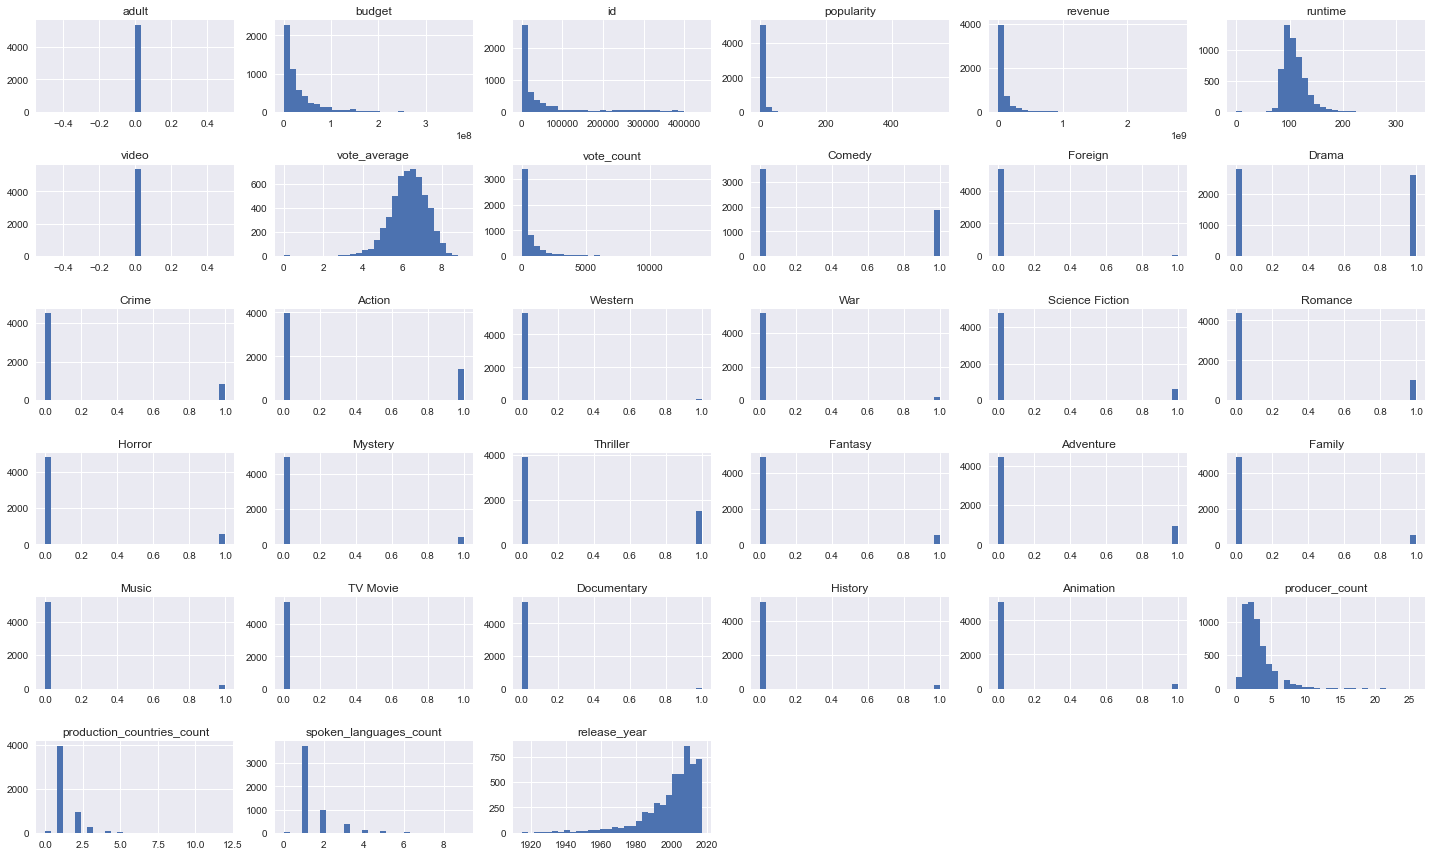

In [121]:
movies = pd.read_csv("data/cleaned_data.csv")
movies.hist(bins=30,figsize=(20,12))
plt.tight_layout();

### 3.1 Top Revenue

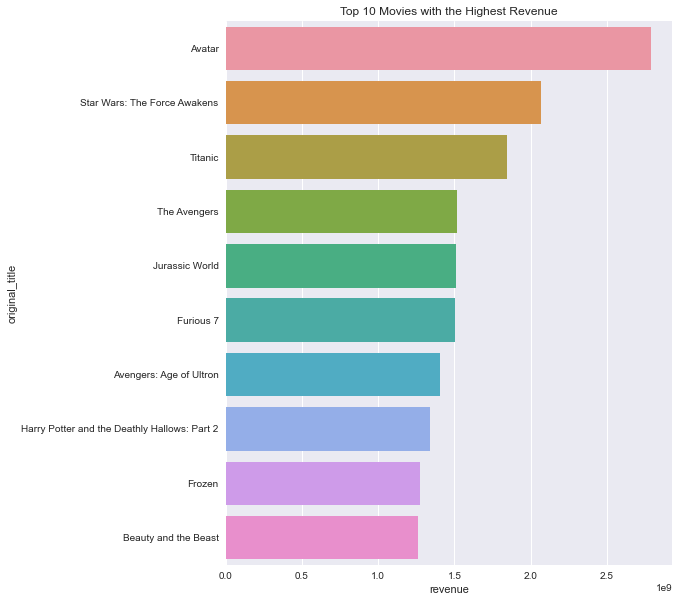

In [122]:
# Top 10 movies with the highest revenue
top_revenue = movies[["original_title", "revenue"]].sort_values("revenue", ascending=False).iloc[:10]

fig, axes = plt.subplots(figsize=(8, 10))
sns.barplot(y="original_title", x="revenue", data=top_revenue, orient="h")
plt.title("Top 10 Movies with the Highest Revenue");

### 3.2 Top Budget

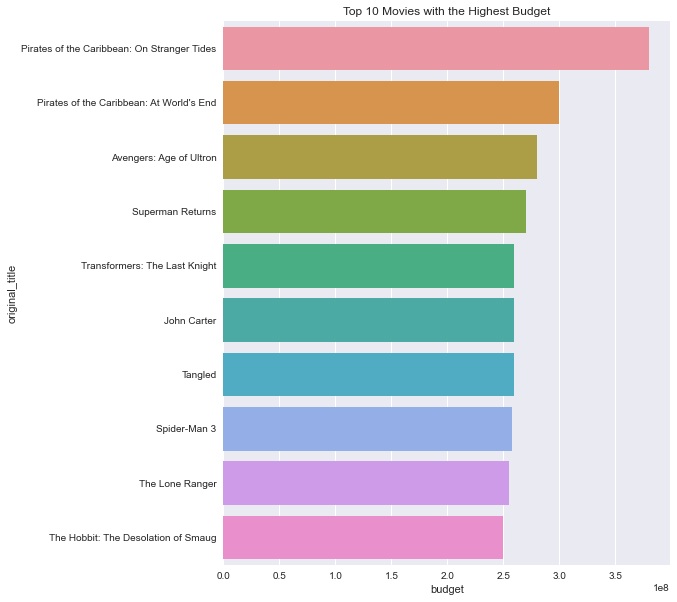

In [123]:
# Top 10 movies with the highest budget
top_budget = movies[["original_title", "budget"]].sort_values("budget", ascending=False).iloc[:10]

fig, axes = plt.subplots(figsize=(8, 10))
sns.barplot(y="original_title", x="budget", data=top_budget, orient="h")
plt.title("Top 10 Movies with the Highest Budget");

### 3.3 Top Profit

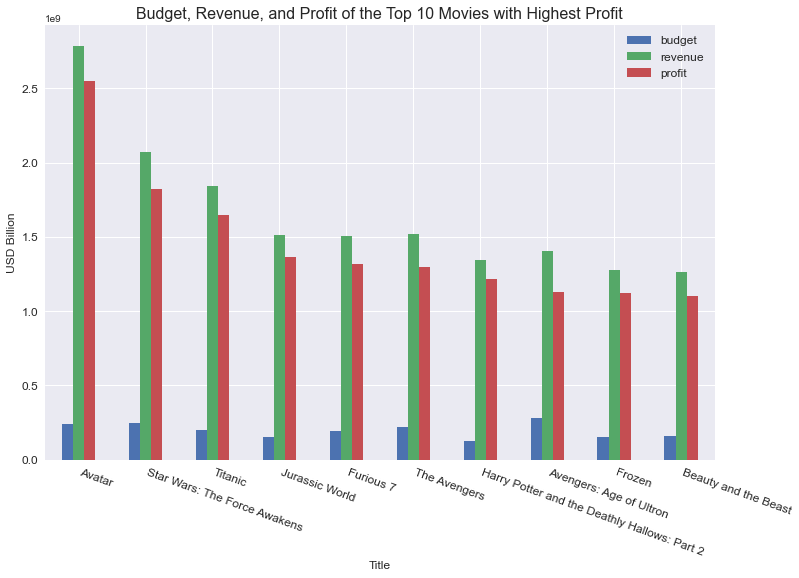

In [124]:
# Top 10 movies with the highest profit
top_profit = movies[["original_title", "revenue", "budget"]]
top_profit["profit"] = top_profit["revenue"] - top_profit["budget"]
top_profit = top_profit.sort_values("profit", ascending=False).iloc[:10]
top_profit.set_index("original_title", inplace=True)

plt.style.use('seaborn')
top_profit.iloc[:, [1, 0, 2]].plot(kind="bar", fontsize=12, figsize=(12, 8))
plt.title("Budget, Revenue, and Profit of the Top 10 Movies with Highest Profit", fontsize=16)
plt.xlabel("Title", fontsize=12)
plt.ylabel("USD Billion", fontsize=12)
plt.xticks(rotation=-20, ha="left")
plt.grid(True)
plt.axes().legend(fontsize=12);

### 3.4 Top Loss (i.e. Least Profit or "Box Office Bombs")

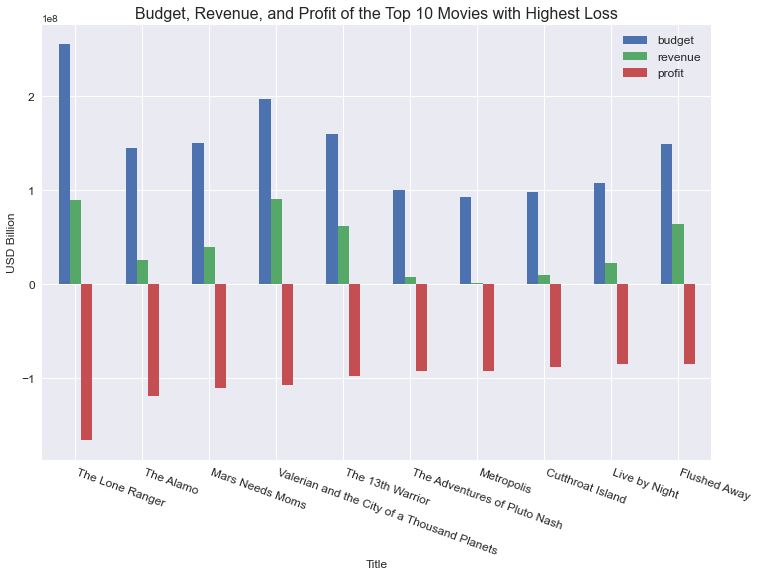

In [125]:
# Top 10 movies with highest loss
top_loss = movies[["original_title", "revenue", "budget"]]
top_loss["profit"] = top_loss["revenue"] - top_loss["budget"]
top_loss = top_loss.sort_values("profit").iloc[:10].set_index("original_title")

plt.style.use('seaborn')
top_loss.iloc[:, [1, 0, 2]].plot(kind="bar", fontsize=12, figsize=(12, 8))
plt.title("Budget, Revenue, and Profit of the Top 10 Movies with Highest Loss", fontsize=16)
plt.xlabel("Title", fontsize=12)
plt.ylabel("USD Billion", fontsize=12)
plt.xticks(rotation=-20, ha="left")
plt.axes().legend(fontsize=12);

### 3.5 Relationship with Revenue

### Budget

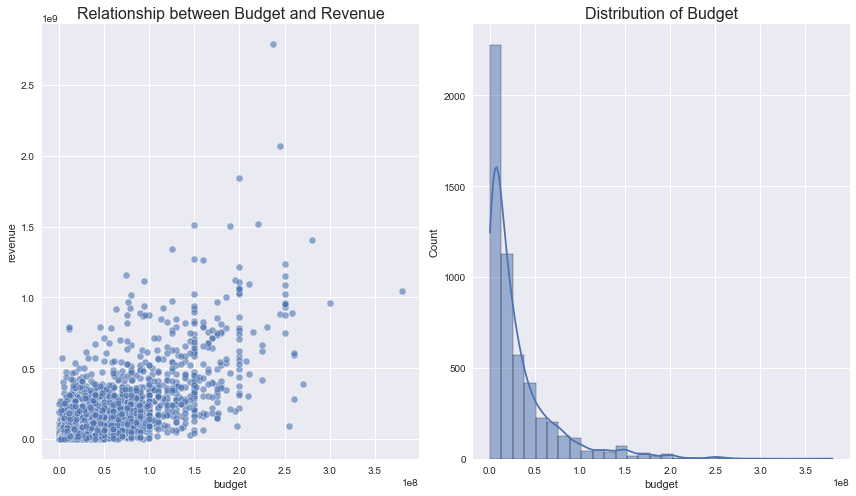

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

sns.scatterplot(x="budget", y="revenue", data=movies, alpha=.6, ax=axes[0])
sns.histplot(x="budget", data=movies, bins=30, kde=True, ax=axes[1])

axes[0].set_title("Relationship between Budget and Revenue", fontsize=16)
axes[1].set_title("Distribution of Budget", fontsize=16)
plt.tight_layout();

### Vote Average and Count

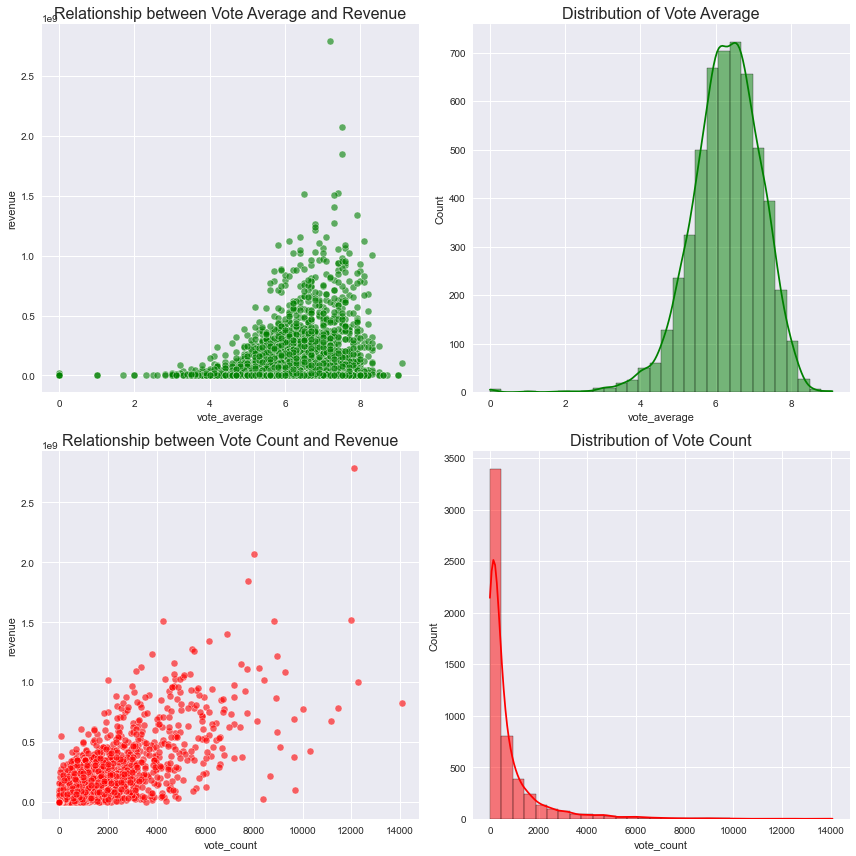

In [154]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(x="vote_average", y="revenue", data=movies, alpha=.6, color='g', ax=axes[0, 0])
sns.histplot(x="vote_average", data=movies, bins=30, kde=True, color='g', ax=axes[0, 1])

sns.scatterplot(x="vote_count", y="revenue", data=movies, alpha=.6, color='r', ax=axes[1, 0])
sns.histplot(x="vote_count", data=movies, bins=30, kde=True, color='r', ax=axes[1, 1])

axes[0, 0].set_title("Relationship between Vote Average and Revenue", fontsize=16)
axes[0, 1].set_title("Distribution of Vote Average", fontsize=16)
axes[1, 0].set_title("Relationship between Vote Count and Revenue", fontsize=16)
axes[1, 1].set_title("Distribution of Vote Count", fontsize=16)
plt.tight_layout();

### Number of Production Companies

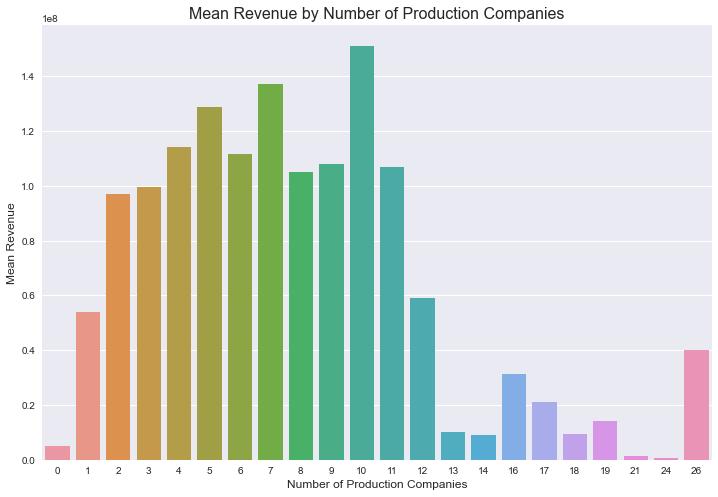

In [128]:
by_producer_cnt = movies.groupby("producer_count")["revenue"].mean().reset_index()
fig, axes = plt.subplots(figsize=(12, 8))
sns.barplot(x="producer_count", y="revenue", data=by_producer_cnt)
plt.title("Mean Revenue by Number of Production Companies", fontsize=16)
plt.xlabel("Number of Production Companies", fontsize=12)
plt.ylabel("Mean Revenue", fontsize=12);

### Original Language

In [129]:
by_language = movies.groupby("original_language")["revenue"].mean().sort_values(ascending=False)
by_language

original_language
en    9.809202e+07
zh    9.593801e+07
ja    5.657803e+07
te    4.911552e+07
xx    4.263028e+07
cn    3.541857e+07
ko    2.754810e+07
da    2.657762e+07
sv    2.641438e+07
hi    2.496719e+07
fr    2.441932e+07
de    2.228060e+07
es    2.140429e+07
ta    1.928846e+07
th    1.805112e+07
it    1.643443e+07
pt    1.384551e+07
ru    1.018975e+07
af    9.879971e+06
pl    9.737355e+06
nl    9.063913e+06
el    8.000000e+06
no    6.945288e+06
he    5.398014e+06
tr    4.823650e+06
mr    4.400000e+06
nb    4.159678e+06
ca    3.770657e+06
ml    3.622777e+06
id    2.392324e+06
fi    1.519627e+06
ur    1.452290e+06
hu    1.029700e+06
fa    9.000000e+05
vi    6.390000e+05
ro    4.206988e+05
kn    1.700000e+05
sr    1.453993e+05
bm    1.110000e+05
is    1.100000e+01
Name: revenue, dtype: float64

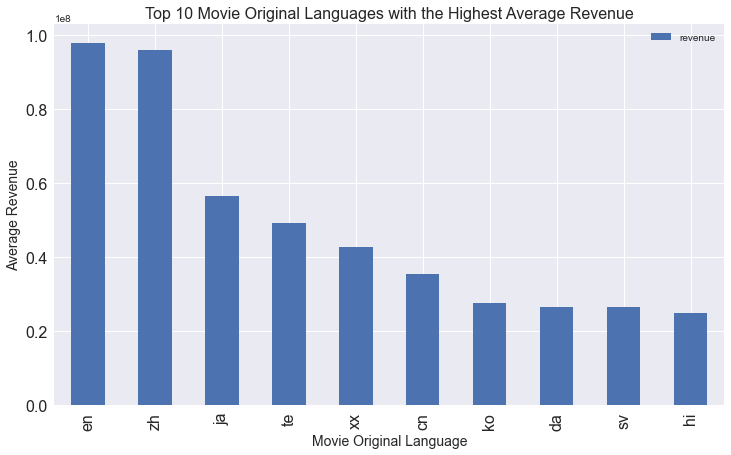

In [130]:
by_language = by_language.reset_index()
by_language.sort_values("revenue", ascending=False, inplace=True)
by_language.set_index("original_language", inplace=True)

by_language.iloc[:10].plot(kind="bar", figsize=(12, 7), fontsize=16)
plt.title("Top 10 Movie Original Languages with the Highest Average Revenue", fontsize=16)
plt.xlabel("Movie Original Language", fontsize=14)
plt.ylabel("Average Revenue", fontsize=14)
plt.tight_layout;

### 3.6 Correlations

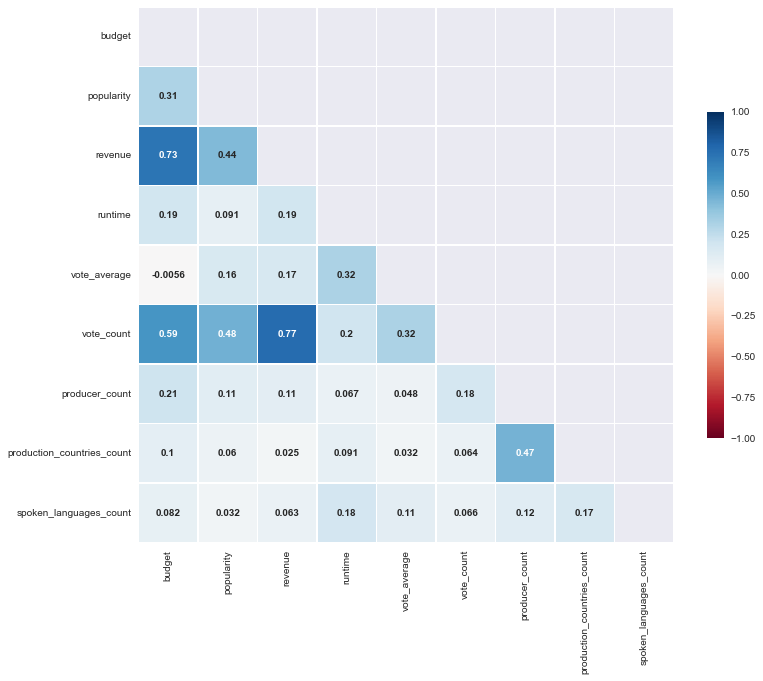

In [141]:
corr = movies.select_dtypes(include=['float64', 'int64'])[["budget",
                                                           "popularity",
                                                           "revenue",
                                                           "runtime",
                                                           "vote_average",
                                                           "vote_count",
                                                           "producer_count",
                                                           "production_countries_count",
                                                           "spoken_languages_count"]].corr()

fig, ax= plt.subplots(figsize=(12, 12))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, square=True, linewidths=.5, cmap='RdBu', vmin=-1, vmax=1,
            cbar_kws={'shrink': .5,}, annot_kws={'fontweight': 'bold'});

## 4. Modeling

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

In [133]:
# Dropping variables that will not be used in the model
movies.drop(columns=["title", "original_title", "id"], inplace=True)

### 4.1 Train Test Split

In [134]:
# Split data into X and y
y = movies["revenue"]
X = movies.drop(columns=["revenue"])

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2 One Hot Encoding

Let's use OneHotEncoder for the non-numeric columns `adult`, `original_language`, `status`, `video`, `producer`, `production_country`, `spoken_langauge`, `release_year`.

In [136]:
categorical_columns = ["adult",
                       "original_language",
                       "status",
                       "video",
                       "producer",
                       "production_country",
                       "spoken_langauge",
                       "release_year"]

ohe = OneHotEncoder(drop="if_binary", max_categories=10, handle_unknown="infrequent_if_exist").fit(X_train[categorical_columns])

# Transform categorical columns into one hot encoding and concatenate with non-categorical columns for training data
X_train_categorical = ohe.transform(X_train[categorical_columns]).toarray()
X_train.drop(columns=categorical_columns, inplace=True)
all_columns = list(X_train.columns) + list(ohe.get_feature_names_out(categorical_columns))
X_train = np.concatenate([X_train.to_numpy(), X_train_categorical], axis=1)

In [137]:
# Apply the same transformation for test data
X_test_categorical = ohe.transform(X_test[categorical_columns]).toarray()
X_test.drop(columns=categorical_columns, inplace=True)
X_test = np.concatenate([X_test.to_numpy(), X_test_categorical], axis=1)

### 4.3 Linear Regression

In [138]:
# Fit a linear regression model
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.coef_)
print(lr.intercept_)

0.6825038123072604
[ 1.76640999e+00  9.95711673e+05  1.78168195e+05 -2.30726217e+06
  6.90800156e+04  1.54240936e+06 -4.93250166e+06 -1.02089870e+07
 -1.03136241e+07 -5.78473037e+06 -2.75859248e+07 -9.82875728e+06
 -3.29189186e+07  1.36086007e+07  9.97391954e+06 -5.48043755e+06
 -3.28883148e+06 -4.26446765e+06  1.62713229e+07  1.95230122e+07
  9.91253334e+06  8.37809639e+07  1.88244792e+07 -1.05346205e+07
  1.82099508e+07 -4.02736251e+06 -2.85660394e+06  2.08643872e+06
  2.98023224e-08 -1.27635153e+07  7.52318747e+06  8.50944860e+06
 -1.34751078e+07 -1.75915279e+07 -4.40566387e+07 -1.13483433e+06
  1.23535712e+07  5.03080544e+07  1.03273623e+07  1.40729187e+07
 -8.05723524e+06 -6.01568343e+06 -1.11758709e-08 -1.86908012e+07
 -1.89627400e+07 -5.91856021e+05 -2.01077054e+06  3.42007008e+06
  4.46391266e+06  1.25319443e+07  2.26893117e+06  1.71707899e+07
  4.00519591e+05 -2.69676124e+07 -1.18522395e+07 -7.95414266e+06
 -2.95207444e+07  1.14427610e+06  6.53337721e+07  1.48480377e+07
  2.18

In [144]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X=X_test)
print("RMSE =", mean_squared_error(y_pred, y_test)**0.5)

RMSE = 78026792.68431492


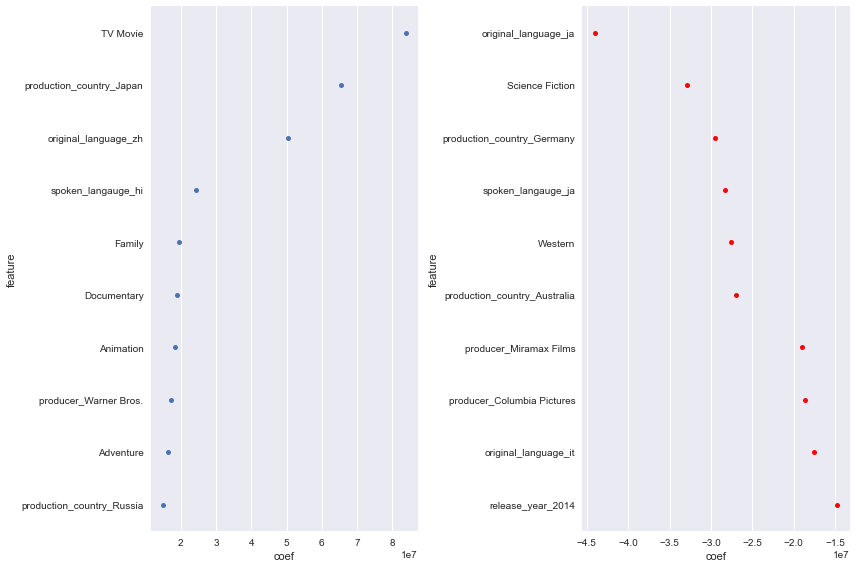

In [163]:
# What are the most positive and most negative coefficients?
coef_df = pd.DataFrame({"feature": all_columns, "coef": lr.coef_})
coef_df_pos = coef_df.sort_values("coef", ascending=False).iloc[:10, :]
coef_df_neg = coef_df.sort_values("coef").iloc[:10, :]

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.stripplot(y="feature", x="coef", data=coef_df_pos, orient="h", ax=axes[0])
sns.stripplot(y="feature", x="coef", data=coef_df_neg, orient="h", color="r", ax=axes[1])
plt.tight_layout();

### 4.4 Random Forest

In [139]:
# Fit a random forest model
rf = RandomForestRegressor().fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.feature_importances_)

0.7395820106520763
[2.27127637e-01 3.47464247e-02 2.64364604e-02 2.09134054e-02
 5.77585339e-01 2.67048212e-03 4.04324076e-07 2.55532978e-03
 1.30429776e-03 2.23330211e-03 4.33352812e-04 3.85751504e-04
 4.35859477e-03 3.81432411e-03 4.96454153e-04 1.16396961e-03
 2.00273203e-03 4.90962799e-03 5.38689716e-03 7.07701419e-03
 1.44467064e-03 8.53672452e-06 4.48818697e-05 2.74842522e-04
 4.85002512e-03 1.50232007e-02 3.28235420e-03 4.84364200e-03
 0.00000000e+00 2.04937606e-04 6.18992851e-06 9.05644341e-05
 3.29440757e-05 4.70305617e-06 6.31500095e-05 2.79478659e-06
 4.45110707e-05 6.52783774e-04 1.09896300e-04 5.80787839e-09
 4.36512621e-07 4.40992385e-07 0.00000000e+00 8.14184733e-04
 2.47752282e-04 8.04098590e-04 6.70237312e-06 1.93459586e-03
 1.38637640e-03 2.38940161e-03 1.76212382e-03 1.18283250e-03
 3.15967868e-03 7.86292340e-04 3.12830897e-04 3.59691526e-04
 6.32151349e-04 4.00840148e-04 1.42535143e-03 5.04356850e-06
 1.92859078e-03 2.68030531e-03 9.85154285e-04 7.91503262e-05
 5.08

In [164]:
y_pred = rf.predict(X=X_test)
print("RMSE =", mean_squared_error(y_pred, y_test)**0.5)

RMSE = 70665915.33511235


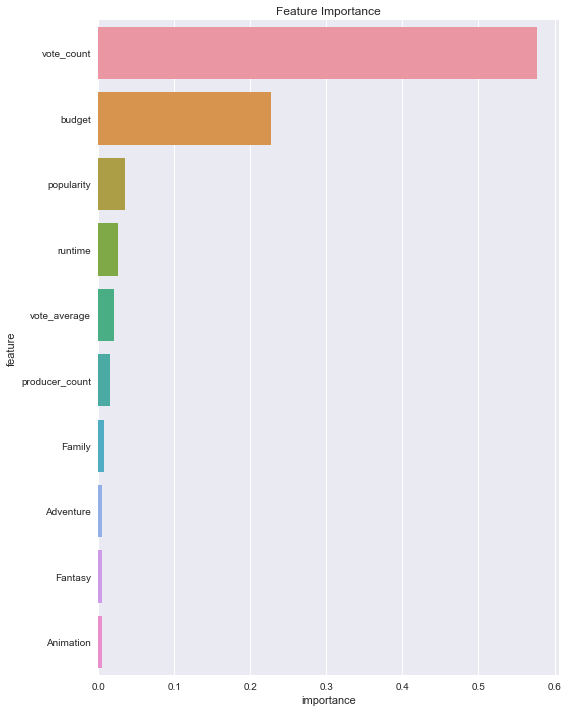

In [140]:
# What features are the most important?
feature_importance_df = pd.DataFrame({"feature": all_columns, "importance": rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False).iloc[:10, :]

fig, axes = plt.subplots(figsize=(8, 10))
sns.barplot(y="feature", x="importance", data=feature_importance_df, orient="h")
plt.title("Feature Importance")
plt.tight_layout();